## Observations and Insights 

In [1]:
#%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Check dimensions of data frames
# mouse_metadata.shape
# study_results.shape


In [3]:
# Combine the data into a single dataset
combine_df=pd.merge(mouse_metadata, study_results, how='inner', on='Mouse ID') 

# Display the data table for preview
combine_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
number_mice=combine_df['Mouse ID'].nunique()
number_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# combine_df.count()
duplicate_df=combine_df[combine_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
print(duplicate_df)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combine_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
#Check for duplicates in clean data frame again
duplicate_df=clean_df[clean_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
print(duplicate_df)

Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


In [9]:
# Checking the number of mice in the clean DataFrame.
number_mice=clean_df['Mouse ID'].nunique()
number_mice

249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_df=clean_df.groupby(['Drug Regimen'])
#print(grouped_df)
grouped_df.head()
# tumor_volume=grouped_df['Tumor Volume (mm3)']
# tumor_volume.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [11]:
number_regimen=clean_df['Drug Regimen'].nunique()
number_regimen

10

In [12]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_drug_reg=clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].mean()
print(f"Mean of the tumor volume for each drug regimen: {mean_drug_reg}")

median_drug_reg=clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].median()
print(f"Median of the tumor volume for each drug regimen: {median_drug_reg}")

variance_drug_reg=clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].var()
print(f"Variance of the tumor volume for each drug regimen: {variance_drug_reg}")

stdev_drug_reg=clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].std()
print(f"Standard Deviation of the tumor volume for each drug regimen: {stdev_drug_reg}")

sem_drug_reg=clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].sem()
print(f"SEM of the tumor volume for each drug regimen: {sem_drug_reg}")

Mean of the tumor volume for each drug regimen:               Tumor Volume (mm3)
Drug Regimen                    
Capomulin              40.675741
Ceftamin               52.591172
Infubinol              52.884795
Ketapril               55.235638
Naftisol               54.331565
Placebo                54.033581
Propriva               52.382993
Ramicane               40.216745
Stelasyn               54.233149
Zoniferol              53.236507
Median of the tumor volume for each drug regimen:               Tumor Volume (mm3)
Drug Regimen                    
Capomulin              41.557809
Ceftamin               51.776157
Infubinol              51.820584
Ketapril               53.698743
Naftisol               52.509285
Placebo                52.288934
Propriva               50.783528
Ramicane               40.673236
Stelasyn               52.431737
Zoniferol              51.818479
Variance of the tumor volume for each drug regimen:               Tumor Volume (mm3)
Drug Regimen             

In [13]:
#?????????# Assemble the resulting series into a single summary dataframe. 
summary_stats_df=pd.DataFrame({
    #"Drug Regimen": clean_df["Drug Regimen"]
#     (summary,index=[0])
#     index:clean_df["Drug Regimen"]
    "Mean" : mean_drug_reg
    ,"Median" : median_drug_reg
    ,"Variance" : variance_drug_reg
    ,"Standard Deviation" : stdev_drug_reg
    ,"SEM" : sem_drug_reg
}, index=[0])
summary_stats_df




,Mean,Median,Variance,Standard Deviation,SEM
0,"(T, u, m, o, r, , V, o, l, u, m, e, , (, m, ...","(T, u, m, o, r, , V, o, l, u, m, e, , (, m, ...","(T, u, m, o, r, , V, o, l, u, m, e, , (, m, ...","(T, u, m, o, r, , V, o, l, u, m, e, , (, m, ...","(T, u, m, o, r, , V, o, l, u, m, e, , (, m, ..."


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

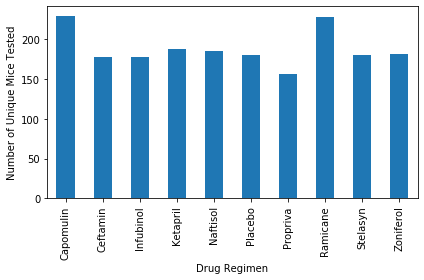

In [16]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_group=clean_df.groupby("Drug Regimen")
count_drugs=drug_group['Drug Regimen'].count()
#count_drugs

count_chart=count_drugs.plot(kind='bar')

count_chart.set_ylabel("Number of Unique Mice Tested")
count_chart.set_xlabel("Drug Regimen")
#plt.figure(20,3)
plt.tight_layout()
plot1 = plt.figure(1)
plt.show()


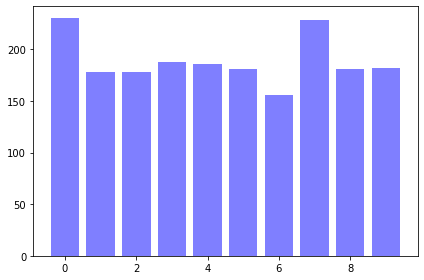

In [34]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(drug_group))
y_axis = count_drugs

plt.bar(x_axis, y_axis, color='b', alpha=0.5, align='center')
# tick_locations=[value for value in x_axis]
# plt.xticks(tick_locations, #?????????????????WHAT DO I PUT HERE, rotation="vertical")

count_chart.set_ylabel("Number of Unique Mice Tested")
count_chart.set_xlabel("Drug Regimen")
plt.tight_layout()
#plt.show()


(-1.100256111605303,
 1.1053783437113598,
 -1.1062425414441643,
 1.103265408136953)

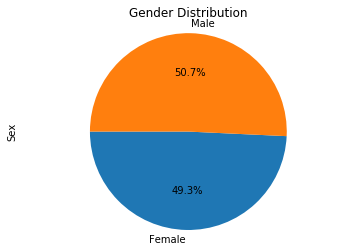

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group=clean_df.groupby("Sex")
count_gender=gender_group['Sex'].count()
count_gender

gender_pie=count_gender.plot(kind="pie", y="Sex",startangle=180,autopct='%1.1f%%', title="Gender Distribution")
gender_pie.set_ylabel("Sex")
plt.axis("equal")


([<matplotlib.patches.Wedge at 0x7fc546f7a210>,
 [Text(-0.02795236146144528, -1.1996743997805108, '930'),
  Text(0.025623100967813093, 1.099701530733132, '958')],
 [Text(-0.01630554418584308, -0.6998100665386312, '49.3%'),
  Text(0.013976236891534414, 0.5998371985817083, '50.7%')])

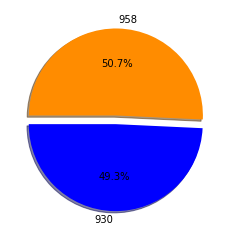

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = count_gender #["Female", "Male"]
sizes = count_gender #[958, 930]
colors=['blue', 'darkorange']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)

###########HOW DO I PROPERLY LABEL???

## Quartiles, Outliers and Boxplots

In [68]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_mice_df = clean_df.groupby("Mouse ID")
greatest_df = grouped_mice_df.max()
greatest_df=greatest_df.reset_index()
greatest_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# merge_df = pd.merge(greatest_df, clean_df, how="inner", on=("Mouse ID", "Timepoint"))
# merge_df
#THIS GAVE ME x and y LABELS 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,45.000000,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [72]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ceftamin','Infubinol','Ramicane']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = greatest_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of tumor volumes is: {lowerq}")
print(f"The upper quartile of tumor volumes is: {upperq}")
print(f"The interquartile range of tumor volumes is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ") 

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The lower quartile of tumor volumes is: 46.91089166
The upper quartile of tumor volumes is: 64.95756185
The interquartile range of tumor volumes is: 18.046670190000007
The the median of tumor volume is: 55.84141007 
Values below 19.840886374999986 could be outliers.
Values above 92.02756713500001 could be outliers.


In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
